In [154]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [155]:
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.rand(100,1)

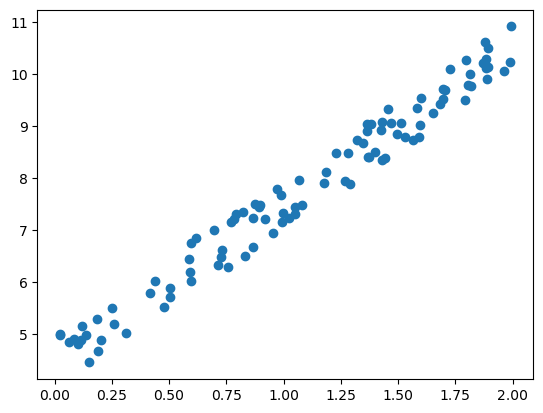

In [156]:
plt.scatter(X,Y)

In [157]:
#Using the closed form to compute theta(O) ---> O = (X^tX)^(-1) X^t y
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.transpose().dot(X_b)).dot(X_b.transpose()).dot(Y)

In [158]:
theta_best

array([[4.53569768],
       [2.97089587]])

In [159]:
results = theta_best.T.dot(X_b.T)

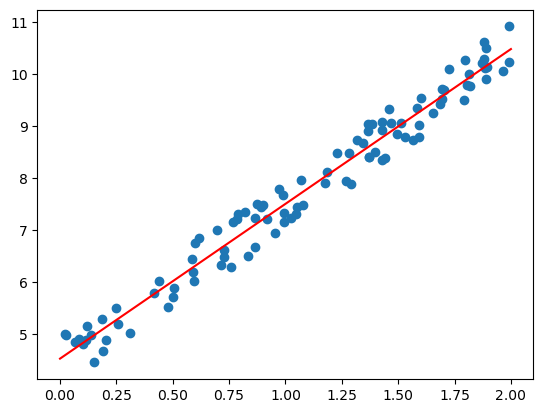

In [160]:
plt.scatter(X,Y)
plt.plot([0,2],[theta_best[0],theta_best[0]+2*theta_best[1]],'r-')

In [161]:
lreg = LinearRegression()
lreg.fit(X,Y)

LinearRegression()

In [162]:
print(lreg.coef_)
print(lreg.intercept_)

[[2.97089587]]
[4.53569768]


### Gradient Descent

In [163]:
def BatchGradDesc(X,Y,theta,iterations,etha): #the batch uses the whole training set in each iteration
    for i in range(iterations):
        gradient = 2.0/len(X)*X.T.dot(X.dot(theta)-Y)
        theta = theta - etha*gradient
    return theta

In [164]:
BatchGradDesc(X_b,Y,np.random.rand(2,1),1000,0.1)

array([[4.53569768],
       [2.97089587]])

In [165]:
def learningSchedule(t,t0,t1):
    return t0/(t+t1)

def StochGradDesc(X,Y,epochs,theta): #the stochastic uses only one instance in X in each iteration which makes it much faster in case the training set is large
    for i in range(epochs):
        for j in range(len(X)):
            random_sample = np.random.randint(0,len(X))
            X_new = X[random_sample:random_sample+1]
            Y_new = Y[random_sample:random_sample+1]
            gradient = 2*X_new.T.dot(X_new.dot(theta)-Y_new)
            theta = theta - learningSchedule(i*len(X)+j,5,50)*gradient
    return theta
        

In [166]:
StochGradDesc(X_b,Y,50,np.random.rand(2,1))

array([[4.52770927],
       [2.98613098]])

In [167]:
from sklearn.linear_model import SGDRegressor

In [168]:
sgdr = SGDRegressor(tol = 1e-3,max_iter=1000,penalty=None,eta0=0.1)

In [169]:
Y_n = Y.reshape(100)
sgdr.fit(X,Y_n)

SGDRegressor(eta0=0.1, penalty=None)

In [170]:
print(sgdr.intercept_,sgdr.coef_)

[4.521789] [3.00925229]


### Polynomial Regression

In [171]:
m = 100
X = 6 * np.random.rand(m,1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

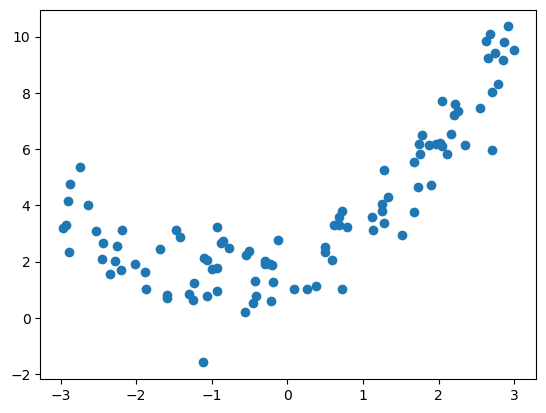

In [172]:
plt.scatter(X,Y)

In [173]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [174]:
#now we apply a lineal reagreession model
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y)

LinearRegression()

In [175]:
lin_reg.intercept_, lin_reg.coef_

(array([1.8053684]), array([[1.00415346, 0.57361983]]))

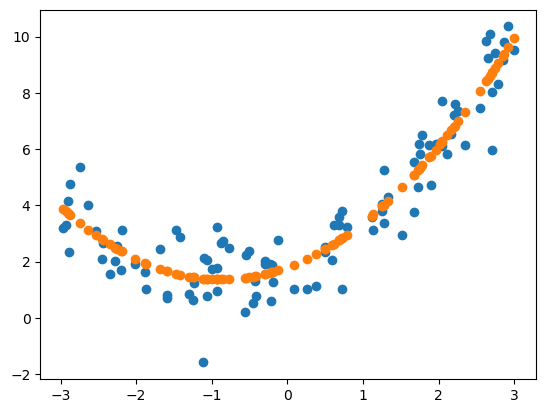

In [176]:
plt.scatter(X,Y)
new_coefs = np.c_[lin_reg.intercept_, lin_reg.coef_]
X_poly_new = np.c_[np.ones((len(X_poly),1)),X_poly]
Y_new = new_coefs.dot(X_poly_new.T)
plt.scatter(X,Y_new.T)

In [177]:
poly_reg_new = PolynomialFeatures(degree=2)

In [178]:
poly_reg_new.fit(X)

PolynomialFeatures()

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_error = []
    val_error = []
    for i in range(len(X)):
        model.fit(X_train[:i+1],y_train[:i+1])
        y_train_predict = model.predict(X_train[:i+1])
        y_val_predict = model.predict(X_val)
        training_error = mean_squared_error(y_train[:i+1],y_train_predict)
        validation_error = mean_squared_error(y_val,y_val_predict)
        train_error.append(np.sqrt(training_error))
        val_error.append(np.sqrt(validation_error))      
    plt.xlim(0,80)
    plt.ylim(0,3)
    plt.plot(train_error,'r*-', label = 'Training Error')
    plt.plot(val_error,'b-', label = 'Validation Error')
    plt.legend()
    
    

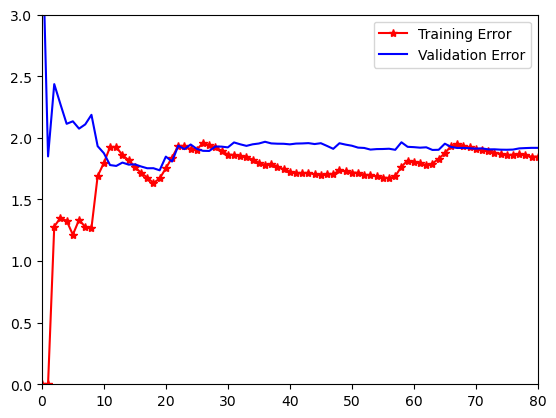

In [180]:
plot_learning_curves(lin_reg,X,Y)

In [181]:
full_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=10, include_bias=False)),
    ('linear',LinearRegression())])

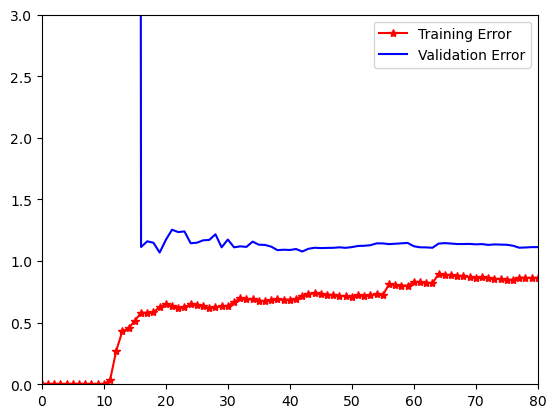

In [182]:
plot_learning_curves(full_pipeline,X,Y)

### Regularization Methods
#### Ridge Regression
##### It is used on linear models in order to avoid overfitting by including a term in the cost function as \alpha/2\sum_{i=1} \theta_i^2

In [183]:
from sklearn.linear_model import Ridge

In [184]:
ridge_reg = Ridge(alpha=0.1)

In [185]:
ridge_reg.fit(X,Y)

Ridge(alpha=0.1)

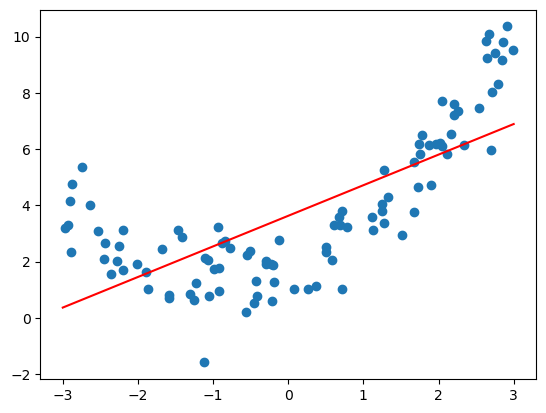

In [186]:
plt.scatter(X,Y)
plt.plot([-3,3],[ridge_reg.intercept_+ridge_reg.coef_[0]*-3,ridge_reg.intercept_+ridge_reg.coef_[0]*3],'r-')

In [187]:
#doing the same for polynomial regression
ridge_reg.fit(X_poly,Y)

Ridge(alpha=0.1)

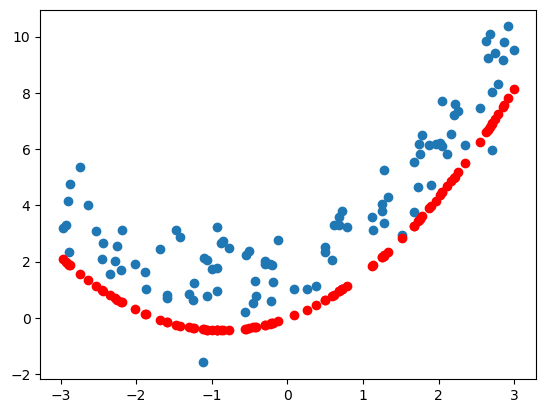

In [188]:
plt.scatter(X,Y)
Y_ridge_poly = ridge_reg.coef_.dot(X_poly.T).T
plt.scatter(X,Y_ridge_poly,c='red')

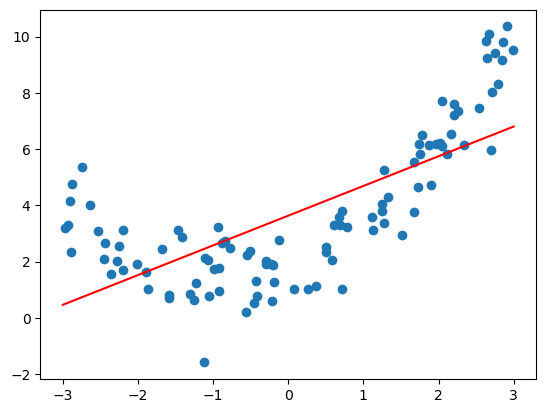

In [189]:
#Similar to Rige, Lasso implements a l_1 norm loss function in the cost function
#It is important to mention that Lasso tends to get rid (make theta_i = 0) for those features that are not relevant
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,Y)
plt.scatter(X,Y)
plt.plot([-3,3],[lasso_reg.intercept_+lasso_reg.coef_*-3,lasso_reg.intercept_+lasso_reg.coef_*3],'r',)

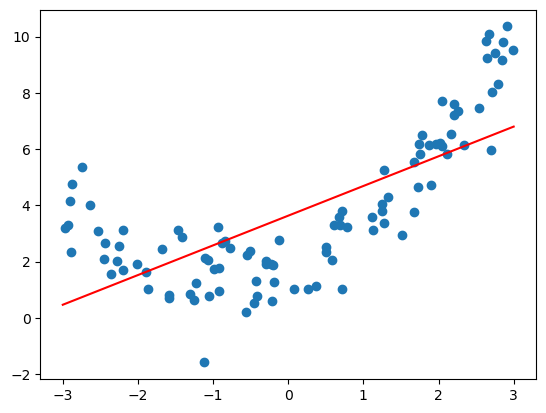

In [190]:
#Elastic net is a mix of Ridge and Lasso (it has alpha and r, the r controls how much of each loss function from Ridge and Lasso you want)
# r=0 it is a Ridge regularization while r=1 it is a Lasso.
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X,Y)
plt.scatter(X,Y)
plt.plot([-3,3],[elastic_reg.intercept_+elastic_reg.coef_*-3,elastic_reg.intercept_+elastic_reg.coef_*3],'r',)

In [191]:
#Early Stopping is a technique which is based on stopping your iterative learning algorithm once you find a minimum in the cost function
#when dealing with the validation set

#from copy import deepcopy #to make a copy of your model
#from sklearn.preprocessing import StandardScaler
#poly_scaler = Pipeline([
#    'poly_features', PolynomialFeatures(degree=90, include_bias=False),
#    'std_scaler', StandardScaler()])
#X_train_poly_scale = poly_scaler.fit_transform(X_train)
#X_val_poly_scale = poly_scaler.fit_transform(X_val)

#sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

#best_epoch = None
#best_model = None
#minimum_val = float("inf")
#for epoch in range(1000):
#    sgd_reg.fit(X_train_poly_scale,Y_train)
#    y_val_predict = sgd_reg.predict(X_val_poly_scale)
#    score = mean_squared_error(y_val,y_val_predict)
#    if score < minimum_val:
#        best_epoch = epoch
#        best_model = deepcopy(sgd_reg)
#        minimum_val = score

### Logistic Regression

In [192]:
from sklearn import datasets
iris = datasets.load_iris()

In [193]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [194]:
X = iris['data'][:,3].reshape(len(iris['data'][:,3]),1) #this is the width of the petal
y = (iris['target'] == 2).astype(int)

In [195]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

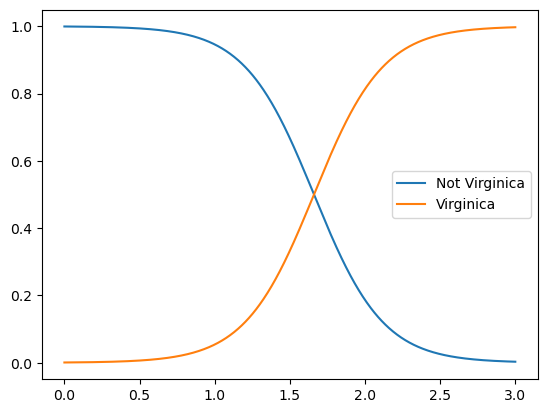

In [196]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,0], label='Not Virginica')
plt.plot(X_new, y_proba[:,1],label = 'Virginica')
plt.legend()

#### Logistic regression uses Softmax when trying to deal with multiclasses

In [197]:
X_new2 = iris['data'][:,2:]
y_new2 = iris['target']

In [198]:
log_reg2 = LogisticRegression(multi_class='multinomial', C=10)

In [199]:
log_reg2.fit(X_new2,y_new2)

LogisticRegression(C=10, multi_class='multinomial')

In [200]:
prov = np.array([[5,2]])
print(log_reg2.predict(prov))
print(log_reg2.predict_proba(prov))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
